In [1]:
import lasagne
import numpy as np
import pickle
import skimage.transform
import scipy

import theano
import theano.tensor as T

from lasagne.utils import floatX

import matplotlib.pyplot as plt
%matplotlib inline

from skimage.io import imread
from skimage import filters

import train_ae

//anaconda/lib/python2.7/site-packages/Theano-0.8.0.dev0-py2.7.egg/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
from lasagne.layers import *
import sys
sys.path.append("../../modules/")
import helper as hp

In [144]:
def build_model(size=28):
    net = {}
    net['input'] = InputLayer((1, 1, size, size))
    net['conv1_1'] = Conv2DLayer(net['input'], num_filters=32, filter_size=(3,3))
    net['pool1'] = Pool2DLayer(net['conv1_1'], pool_size=(2,2), mode='average_exc_pad')
    net['conv1_2'] = Conv2DLayer(net['pool1'], num_filters=64, filter_size=(3,3))
    net['pool2'] = Pool2DLayer(net['conv1_2'], pool_size=(2,2), mode='average_exc_pad')
    net['conv1_3'] = Conv2DLayer(net['pool2'], num_filters=128, filter_size=(3,3))
    print "number of params: %i" % count_params(net["conv1_3"])
    for layer in get_all_layers(net["conv1_3"]):
        print layer, layer.output_shape
    return net

In [243]:
def build_model_2(size=128):
    net = {}
    net['input'] = InputLayer((1, 1, size, size))
    net['conv1_1'] = Conv2DLayer(net['input'], num_filters=32, filter_size=(3,3))
    net['pool1'] = Pool2DLayer(net['conv1_1'], pool_size=(2,2), mode='average_exc_pad')
    net['conv1_2'] = Conv2DLayer(net['pool1'], num_filters=64, filter_size=(3,3))
    net['pool2'] = Pool2DLayer(net['conv1_2'], pool_size=(2,2), mode='average_exc_pad')
    net['conv1_3'] = Conv2DLayer(net['pool2'], num_filters=128, filter_size=(3,3))
    net['pool3'] = Pool2DLayer(net['conv1_3'], pool_size=(2,2), mode='average_exc_pad')
    net['conv1_4'] = Conv2DLayer(net['pool3'], num_filters=256, filter_size=(3,3))    
    print "number of params: %i" % count_params(net["conv1_4"])
    for layer in get_all_layers(net["conv1_3"]):
        print layer, layer.output_shape
    return net

In [3]:
train_set, valid_set, test_set = hp.load_mnist("../../data/mnist.pkl.gz")
Xt, yt = train_set

In [4]:
Xt9 = Xt[ yt == 9, ]

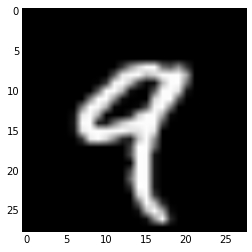

In [5]:
plt.imshow(Xt9[0:1][0][0], cmap="gray")

In [215]:
rock = imread("rocks2.jpg")
rock = rock.reshape( (1, 1, 64, 64) ).astype("float32")

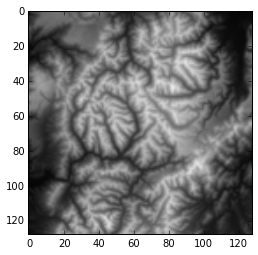

In [6]:
heightmap = imread("heightmap1.jpg") / 255.0
heightmap = heightmap.reshape( (1, 1, 128, 128) ).astype("float32")
plt.imshow(heightmap[0][0], cmap="gray", vmin=0, vmax=1)

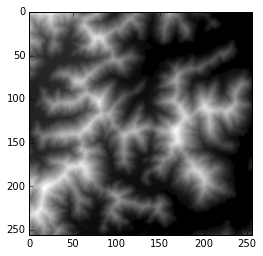

In [29]:
heightmap = np.load("train_data_minimal.npy")[0:1]
plt.imshow(heightmap[0][0], cmap="gray", vmin=0, vmax=1)

In [7]:
def gram_matrix(x):
    x = x.flatten(ndim=3)
    g = T.tensordot(x, x, axes=([2], [2]))
    return g

def style_loss(A, X, layer):
    a = A[layer]
    x = X[layer]
    
    A = gram_matrix(a)
    G = gram_matrix(x)
    
    N = a.shape[1]
    M = a.shape[2] * a.shape[3]
    
    loss = 1./(4 * N**2 * M**2) * ((G - A)**2).sum()
    return loss

def total_variation_loss(x):
    return (((x[:,:,:-1,:-1] - x[:,:,1:,:-1])**2 + (x[:,:,:-1,:-1] - x[:,:,:-1,1:])**2)**1.25).sum()

In [97]:
#net = build_model_2(size=128)
net_raw = train_ae.get_net({})
with open("output/model2.pkl") as f:
    set_all_param_values(net_raw, pickle.load(f))
layers = {}
for layer in get_all_layers(net_raw):
    if isinstance(layer, Conv2DLayer):
        layers[ str(layer) ] = layer
print layers

{'<lasagne.layers.conv.Conv2DLayer object at 0x11e8a45d0>': <lasagne.layers.conv.Conv2DLayer object at 0x11e8a45d0>, '<lasagne.layers.conv.Conv2DLayer object at 0x1298caed0>': <lasagne.layers.conv.Conv2DLayer object at 0x1298caed0>, '<lasagne.layers.conv.Conv2DLayer object at 0x11e8a4b50>': <lasagne.layers.conv.Conv2DLayer object at 0x11e8a4b50>, '<lasagne.layers.conv.Conv2DLayer object at 0x1262fbf90>': <lasagne.layers.conv.Conv2DLayer object at 0x1262fbf90>}


number of params: 240256
<lasagne.layers.input.InputLayer object at 0x1298ca710>,(None, 1, 256, 256)
<lasagne.layers.noise.GaussianNoiseLayer object at 0x1298caf90>,(None, 1, 256, 256)
<lasagne.layers.conv.Conv2DLayer object at 0x1298caed0>,(None, 32, 254, 254)
<lasagne.layers.pool.MaxPool2DLayer object at 0x1298ca790>,(None, 32, 127, 127)
<lasagne.layers.conv.Conv2DLayer object at 0x1262fbf90>,(None, 64, 125, 125)
<lasagne.layers.pool.MaxPool2DLayer object at 0x1262fbc90>,(None, 64, 62, 62)
<lasagne.layers.conv.Conv2DLayer object at 0x11e8a4b50>,(None, 128, 60, 60)
<lasagne.layers.conv.Conv2DLayer object at 0x11e8a45d0>,(None, 128, 58, 58)
<lasagne.layers.special.InverseLayer object at 0x126b16050>,(None, 128, 60, 60)
<lasagne.layers.special.InverseLayer object at 0x126b162d0>,(None, 64, 62, 62)
<lasagne.layers.special.InverseLayer object at 0x127565b90>,(None, 64, 125, 125)
<lasagne.layers.special.InverseLayer object at 0x1273328d0>,(None, 32, 127, 127)
<lasagne.layers.special.Invers

In [12]:
#layers = ['conv1_1', 'conv1_2', 'conv1_3']
#layers = {k: net[k] for k in layers}

In [98]:
#photo = Xt9[0:1]
#photo = rock
photo = heightmap
print photo.dtype

float32


In [99]:
input_im_theano = T.tensor4()
outputs = lasagne.layers.get_output(layers.values(), input_im_theano)

art_features = {k: theano.shared(output.eval({input_im_theano: photo}))
                for k, output in zip(layers.keys(), outputs)}

In [100]:
art_features

{'<lasagne.layers.conv.Conv2DLayer object at 0x11e8a45d0>': <TensorType(float64, 4D)>,
 '<lasagne.layers.conv.Conv2DLayer object at 0x11e8a4b50>': <TensorType(float64, 4D)>,
 '<lasagne.layers.conv.Conv2DLayer object at 0x1262fbf90>': <TensorType(float64, 4D)>,
 '<lasagne.layers.conv.Conv2DLayer object at 0x1298caed0>': <TensorType(float64, 4D)>}

In [101]:
generated_image = theano.shared(floatX(np.random.uniform(0, 1, photo.shape)))
gen_features = lasagne.layers.get_output(layers.values(), generated_image)
gen_features = {k: v for k, v in zip(layers.keys(), gen_features)}
gen_features

{'<lasagne.layers.conv.Conv2DLayer object at 0x11e8a45d0>': Elemwise{tanh,no_inplace}.0,
 '<lasagne.layers.conv.Conv2DLayer object at 0x11e8a4b50>': Elemwise{tanh,no_inplace}.0,
 '<lasagne.layers.conv.Conv2DLayer object at 0x1262fbf90>': Elemwise{tanh,no_inplace}.0,
 '<lasagne.layers.conv.Conv2DLayer object at 0x1298caed0>': Elemwise{tanh,no_inplace}.0}

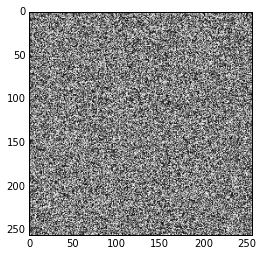

In [102]:
plt.imshow( generated_image.get_value()[0][0], cmap="gray", vmin=0, vmax=1 )

In [103]:
# Define loss function
losses = []

# style loss
for key in layers:
    losses.append(1e7*style_loss(art_features, gen_features, key))

# total variation penalty 0.1e-7
losses.append(0.001 * total_variation_loss(generated_image))

total_loss = sum(losses)

In [104]:
grad = T.grad(total_loss, generated_image)

In [105]:
# Theano functions to evaluate loss and gradient
f_loss = theano.function([], total_loss)
f_grad = theano.function([], grad)

# Helper functions to interface with scipy.optimize
def eval_loss(x0):
    x0 = floatX(x0.reshape(photo.shape))
    generated_image.set_value(x0)
    return f_loss().astype('float64')

def eval_grad(x0):
    x0 = floatX(x0.reshape(photo.shape))
    generated_image.set_value(x0)
    return np.array(f_grad()).flatten().astype('float64')

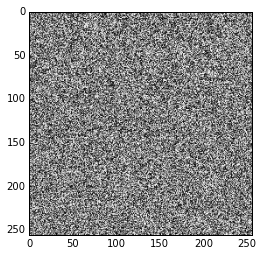

In [106]:
# Initialize with a noise image
generated_image.set_value(floatX(np.random.uniform(0, 1, photo.shape)))
#generated_image.set_value( floatX( 
#        filters.gaussian_filter(photo[0][0], 5).reshape( photo.shape )
#) )
plt.imshow(generated_image.get_value()[0][0], cmap="gray")

In [110]:
#x0 = generated_image.get_value().astype('float64')
#xs = []
#xs.append(x0)

x0 = xs[-1]

# Optimize, saving the result periodically
for i in range(10):
    scipy.optimize.fmin_l_bfgs_b(eval_loss, x0.flatten(), fprime=eval_grad, maxfun=40)
    x0 = generated_image.get_value().astype('float64')
    xs.append(x0)

21


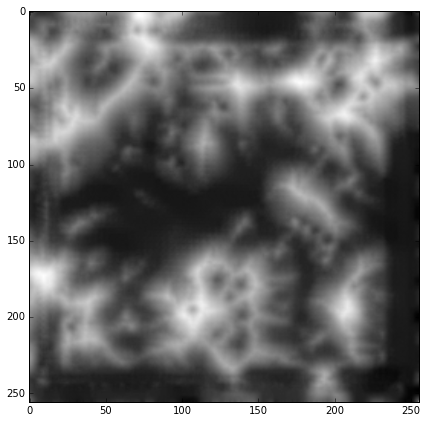

In [115]:
print len(xs)
plt.figure(figsize=(7,7))
plt.imshow(xs[-1][0][0], cmap='gray')

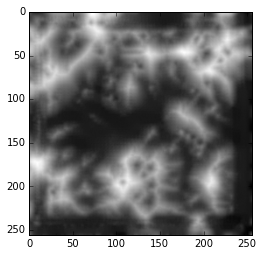

In [116]:
for xt in [xs[-1]]:
    plt.imshow(xt[0][0], cmap='gray')
    plt.savefig("output/gen4.png")

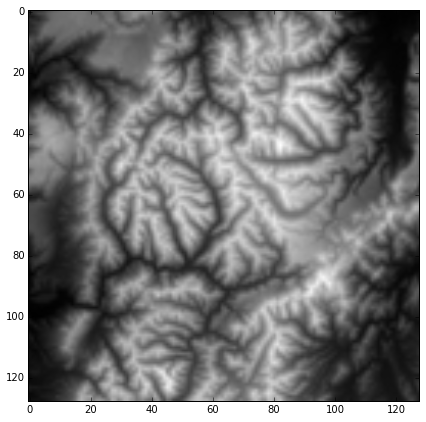

In [377]:
# original photo
plt.figure(figsize=(7,7))
plt.imshow(photo[0][0], cmap='gray')

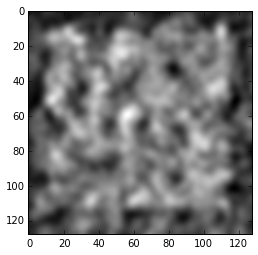

In [345]:
plt.imshow( filters.gaussian_filter(xs[-1][0][0], 2), cmap="gray")

----

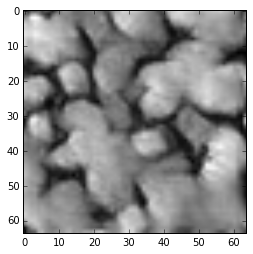

In [227]:
plt.imshow(xs[-1][0][0], cmap='gray')

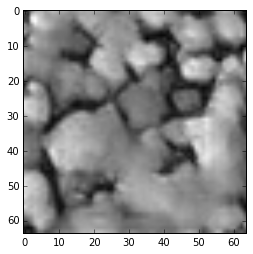

In [230]:
plt.imshow(xs[-1][0][0], cmap='gray')

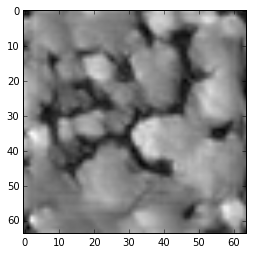

In [242]:
plt.imshow(xs[-1][0][0], cmap='gray')